In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [17]:
class DNN(nn.Module):
    def __init__(self, dim_in, dim_out, width, depth):
        super(DNN, self).__init__()
        self.depth = depth
        self.layers = nn.ModuleList([nn.Linear(dim_in if i == 0 else width, width) for i in range(self.depth)])
        self.output_layer = nn.Linear(width, dim_out)
        self.relu = nn.ReLU()

    def forward(self, x):
        for layer in self.layers:
            x = self.relu(layer(x))
        x = self.output_layer(x)
        return x

In [31]:
# load models/model_init.pt
model = torch.load('models/model_init.pt')
# flatten all the parameters
params = torch.cat([p.view(-1) for p in model.values()])
# compute absolute value of the parameters
params = torch.abs(params)
# compute the entropy of the parameters

entropy = -torch.sum(params * torch.log(params))
print(entropy)

tensor(10424.7148)


In [37]:
model1 = torch.load(f'models/model1.pt')
model1.keys()

odict_keys(['layers.0.weight', 'layers.0.bias', 'layers.1.weight', 'layers.1.bias', 'output_layer.weight', 'output_layer.bias'])

In [32]:
for i in range(7):
    # load models/model_i.pt
    model = torch.load(f'models/model{i}.pt')
    # flatten all the parameters
    params = torch.cat([p.view(-1) for p in model.values()])
    # compute absolute value of the parameters
    params = torch.abs(params)
    # remove zero values
    params = params[params != 0]
    # compute the entropy of the parameters
    entropy = -torch.sum(params * torch.log(params))
    print(f'entropy of model_{i}.pt: {entropy}')


entropy of model_0.pt: 16289.23046875
entropy of model_1.pt: -107311.1953125
entropy of model_2.pt: -89057.90625
entropy of model_3.pt: -42785.26953125
entropy of model_4.pt: -8153.16259765625
entropy of model_5.pt: 3486.763671875
entropy of model_6.pt: -1669.8179931640625


In [ ]:
model6 = torch.load(f'models/model6.pt')
# do inference


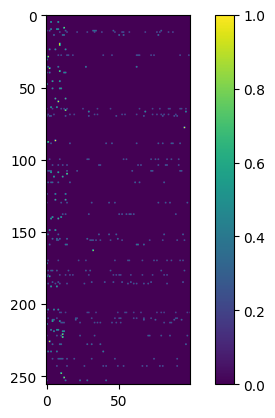

In [28]:
wt_mat = model6['layers.0.weight_mask'].detach().cpu()
w1_normed=F.normalize(wt_mat,p=2,dim=1)
#visualise w1_normed as heat-map just in absolute values
plt.imshow(w1_normed.abs().numpy())
plt.colorbar()
plt.show()

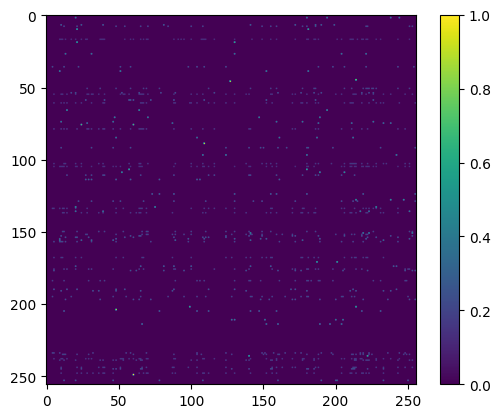

In [29]:
wt_mat = model6['layers.1.weight_mask'].detach().cpu()
w1_normed=F.normalize(wt_mat,p=2,dim=1)
#visualise w1_normed as heat-map just in absolute values
plt.imshow(w1_normed.abs().numpy())
plt.colorbar()
plt.show()